In [1]:
import tensorflow as tf

# Hide GPU from visible devices for tensorflow 2.3.1 and above
tf.config.set_visible_devices([], 'GPU')

# # To find out which devices your operations and tensors are assigned to
# tf.debugging.set_log_device_placement(True)

# # Create some tensors and perform an operation
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

# expecting result

# 2.3.1
# Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
# tf.Tensor(
# [[22. 28.]
#  [49. 64.]], shape=(2, 2), dtype=float32)

import cv2 ## pip install opencv-python
            ## pip install opencv-contrib-python (full package)
    
import matplotlib.pyplot as plt

from deepface import DeepFace  ## pip install deepface

In [2]:
img = cv2.imread('image_data//happyboy.jpg')

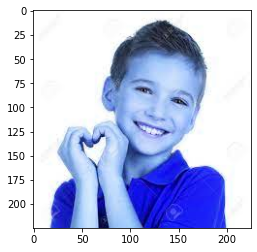

In [3]:
plt.imshow(img) ## BGR

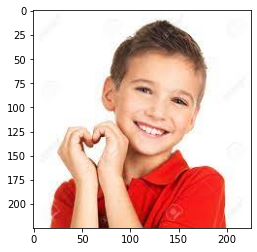

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 163ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:01<00:04,  1.42s/it]

1/1 [==============================] - 0s 379ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.18it/s]

1/1 [==============================] - 0s 425ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:02<00:00,  1.49it/s]

1/1 [==============================] - 0s 389ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


In [6]:
predictions

{'emotion': {'angry': 6.235118515535115e-18,
  'disgust': 1.7321371988365815e-25,
  'fear': 1.9543926744669907e-18,
  'happy': 99.99999403953517,
  'sad': 1.353104277335135e-15,
  'surprise': 1.2646773080063537e-14,
  'neutral': 7.046409387424761e-06},
 'dominant_emotion': 'happy',
 'region': {'x': 78, 'y': 45, 'w': 110, 'h': 110},
 'age': 19,
 'gender': 'Woman',
 'race': {'asian': 5.884699566996149,
  'indian': 7.411160926680455,
  'black': 1.0537547665828744,
  'white': 21.67027632352396,
  'middle eastern': 32.43068964115505,
  'latino hispanic': 31.54941123134956},
 'dominant_race': 'middle eastern'}

In [7]:
type(predictions)

dict

In [9]:
predictions['dominant_emotion']

'happy'

# Drawing rectangle around the face

In [12]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Download haarcascade_frontalface_default.xml from GitHub
# Haar is used for face detection and recognition

In [15]:
# convert BGR to GRAY as Haar works on gray color image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# print(faceCascade.empty())

faces = faceCascade.detectMultiScale(gray, 1.1, 4)

# draw rectangle around the face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) # code on image
# rectangle(image wanna draw, starting point, ending point, color(BGR), line width)

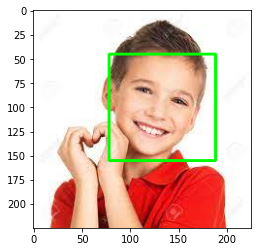

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Put text lable

In [22]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for inserting text on video

cv2.putText(img, predictions['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4); # putting ; to eliminate showing result

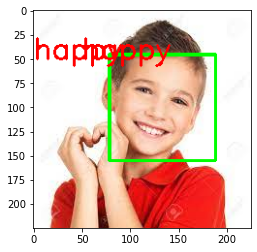

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

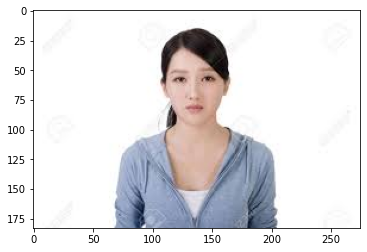

In [24]:
img = cv2.imread('image_data//sadwoman.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:02,  1.43it/s]

1/1 [==============================] - 1s 696ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.35it/s]

1/1 [==============================] - 1s 801ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:02<00:00,  1.26it/s]

1/1 [==============================] - 1s 672ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.31it/s]


In [26]:
predictions

{'emotion': {'angry': 0.08435306874904447,
  'disgust': 2.0939671384823163e-09,
  'fear': 0.025416545455026356,
  'happy': 0.2904102146497497,
  'sad': 0.6755524717600627,
  'surprise': 1.1296064135693868e-05,
  'neutral': 98.92425530697437},
 'dominant_emotion': 'neutral',
 'region': {'x': 103, 'y': 34, 'w': 63, 'h': 63},
 'age': 31,
 'gender': 'Woman',
 'race': {'asian': 98.69090310876985,
  'indian': 0.08868696696680588,
  'black': 0.0004971098247356981,
  'white': 0.17080105462229578,
  'middle eastern': 0.0008251529416859041,
  'latino hispanic': 1.0482922821219136},
 'dominant_race': 'asian'}

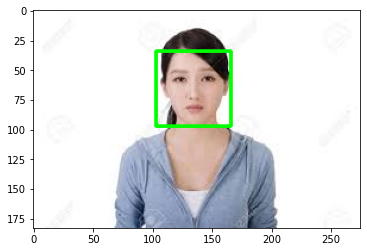

In [27]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

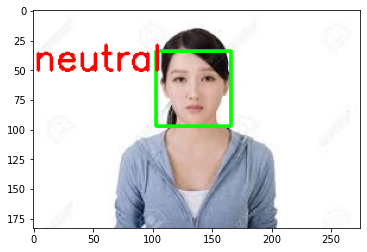

In [28]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, predictions['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4);

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))